# Tarea 2

### Luis Armando Pérez Rey

In [115]:
using PyPlot

## 1. Histogramas

La función histograma cuenta con dos entradas. Una de ellas corresponde al arreglo de $N$ valores aleatorios obtenidos por la función ```randn(N)```. Dicho conjunto de valores lo denotaremos como $Y$. La otra entrada corresponderá a la cantidad de divisiones $n_{hist}$ que deseemos hacer en el intervalo $x$ de valores obtenidos. 
Dicho intervalo de valores se divide en subintervalos del mismo tamaño. A partir del supremo y el ínfimo se define el tamaño de cada subintervalo como: $\Delta x=\frac{\text{sup}(x)-\text{inf}(x)}{n_{hist}}$. Cada subintervalo forma una "caja" de la forma $[x_0,x_1)$,$[x_1,x_2)$, $\ldots$, $[x_{n-1},x_n)$. El intervalo contiene $n_{hist}$ cajas. Para obtener el histograma de los valores $x$ estos se clasifican y se colocan en cada caja contando el número de elementos que hay en ellas. 

Para poder obtener el histograma leyendo una sola vez los datos, la forma más conveniente consiste en leer cada entrada de datos de $Y$ e ir clasificandola en cada una de las cajas disponibles. Un vector de tamaño $n_{hist}$ guarda la información del número de elementos en cada caja y cuenta las apariciones. 



In [2]:
"""
La función histograma tiene como salida un vector de tamaño n_hist a partir de un 
arreglo de valores flotantes.
Tiene como entrada el arreglo de valores flotantes y el número de divisiones que tiene el intervalo.

"""
function histograma(valores::Array{Float64,1},n_hist::Int)
    #Definimos primero nuestro vector de salida con tamaño n_hist con entradas cero
    salida=zeros(Int,n_hist);
    #Definimos al supremo y al ínfimo de nuestro conjunto de valores
    sup=maximum(valores);
    inf=minimum(valores);
    #Definimos el tamaño de cada subintervalo
    Δx=(sup-inf)/n_hist;
    #Con el contador i recorremos los valores del vector de entrada una vez
    for i=1:length(valores)
    #Cada valor es clasificado en una de las "cajas". Al encontrar la pertenencia de un 
    #valor a una caja, aumenta la entrada correspondiente.
        for j=1:n_hist
            if valores[i]<inf+j*Δx && valores[i]>=inf+(j-1)*Δx
                salida[j]+=1;
                #Un break nos permite parar la búsqueda una vez que hemos encontrado la caja apropiada.
                break;
            end
        end
    end
    return salida;
end

histograma (generic function with 1 method)

Una vez hecha nuestra función, la probaremos con un arreglo de $N=10000$ número aleatorios. Dividiremos el intervalo en $n_{hist}=100$ partes.

Para hacer la gráfica de nuestro histograma definiremos los intervalos de nuestras cajas a partir del punto medio de cada una de ellas (con el fin de que estén centrados los datos en la gráfica). Es decir tendremos los puntos $X=\{x_0+\frac{\Delta x}{2},x_0+\frac{3\Delta x}{2},x_0+\frac{5\Delta x}{2}, \ldots, x_0+\frac{(2n_{hist}-1)\Delta x}{2} \}$.

La gráfica del histograma se obtiene a partir de graficar el vector de salida de la función respecto al conjunto de valores de $X$

In [3]:
N=10000; #Número de valores aleatorios
n_hist=100; #Número de divisiones en nuestro intervalo
valores=randn(N); #Obtención de los valores aleatorios
salida=histograma(valores,n_hist); #Vector del histograma
sup=maximum(valores); #Supremo del conjunto de valores
inf=minimum(valores); #Ínfimo del conjunto de valores
Δx=(sup-inf)/n_hist; #Tamaño del conjunto de valores
x0=inf+Δx/2; #Valor inicial del conjunto
xf=sup-Δx/2; #Valor final del conjunto
x=eval(x0:Δx:xf);

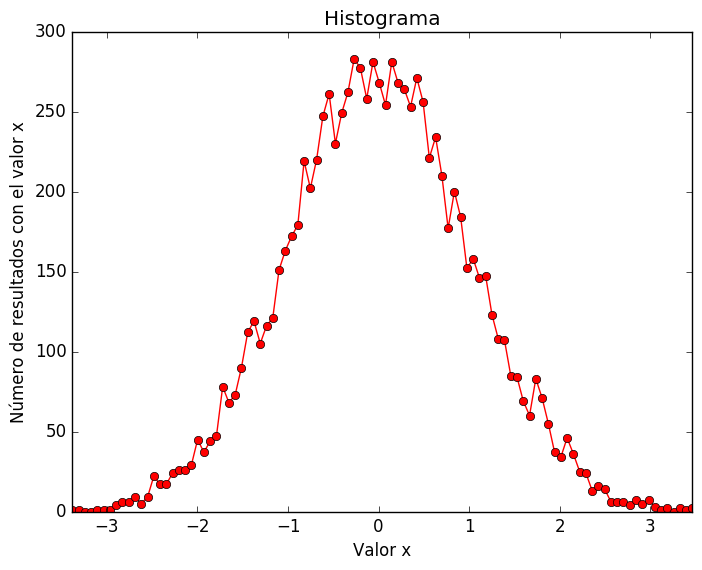

(-3.380532271750469,3.4640369095351637)

In [4]:
plot(x,salida,"ro-")
xlabel("Valor x")
ylabel("Número de resultados con el valor x")
title("Histograma")
xlim(x0,xf)


Sacando el histograma.

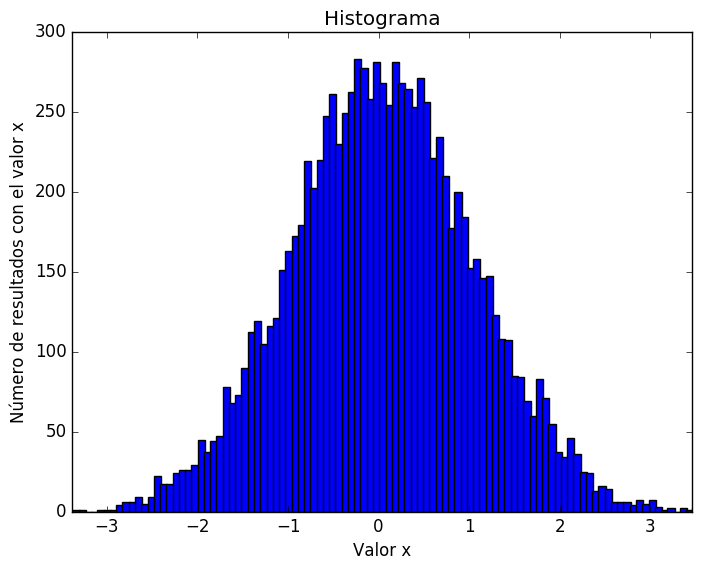

(-3.380532271750469,3.4640369095351637)

In [5]:
bar(width=0.08,x,salida) #No olvidemos redimensionar esas barras o estaremos en problemas
xlabel("Valor x")
ylabel("Número de resultados con el valor x")
title("Histograma")
xlim(x0,xf)

Ahora comparando con la función estándar `plt[:hist]` que tiene Julia.

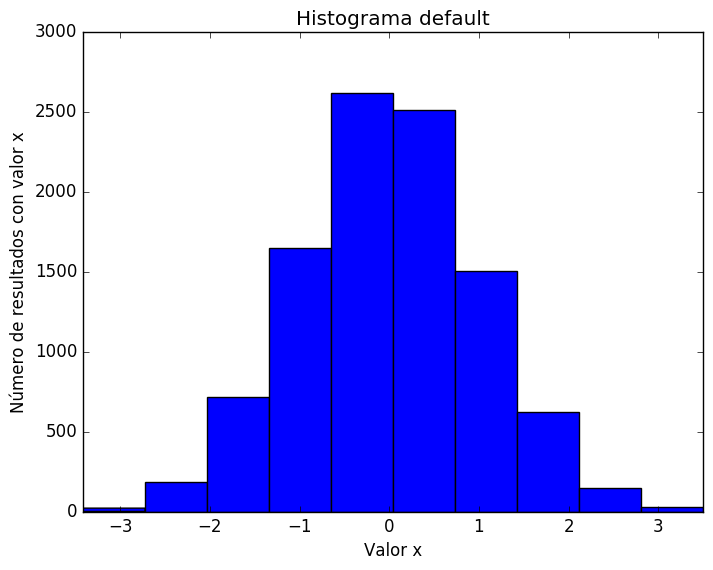

(-3.415100802969083,3.498605440753778)

In [6]:
plt[:hist](valores);
title("Histograma default")
xlabel("Valor x")
ylabel("Número de resultados con valor x")
xlim(inf,sup)

Siendo sinceros, no se ve tan bonita. Sin embargo con nuestra función también podemos llegar a una resolución del mismo estilo si hacemos que $n_{hist}=10$

In [7]:
n_hist=10; #Número de divisiones en nuestro intervalo
salida=histograma(valores,n_hist); #Vector del histograma
sup=maximum(valores); #Supremo del conjunto de valores
inf=minimum(valores); #Ínfimo del conjunto de valores
Δx=(sup-inf)/n_hist; #Tamaño del conjunto de valores
x0=inf+Δx/2; #Valor inicial del conjunto
xf=sup-Δx/2; #Valor final del conjunto
x=eval(x0:Δx:xf);

Grafiquemos nuevamente estos resultados con barras.

In [8]:
bar(width=0.8,x,salida) 
xlabel("Valor x")
ylabel("Número de resultados con el valor x")
title("Histograma")
xlim(x0,xf)

LoadError: LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError("incompatible sizes: argument 'height' must be length 9 or scalar",)
  File "/home/luis/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py", line 2643, in bar
    **kwargs)
  File "/home/luis/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py", line 1812, in inner
    return func(ax, *args, **kwargs)
  File "/home/luis/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 2080, in bar
    "must be length %d or scalar" % nbars)

while loading In[8], in expression starting on line 1

El resultado de la función creada y la existente es bastante parecido. ¿Cuál es entonces la diferencia entre ambas? Podemos ver que la función existente divide el espacio en un número dado de cajas. Mientras que nuestra función nos permite ir más allá para refinar la resolución como nosotros deseemos.

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


## 2. Promedio y varianza
#### a) A partir de los datos del ejercicio anterior podemos sacar el promedio y la varianza y comparar nuestros resultados con los de las funciones de Julia `mean` y `var`.



Para obtener el promedio de un conjunto de datos $Y$ se utiliza la fórmula $\bar{Y}=\frac{1}{N}\sum_{i=1}^{N}y_i$ donde $y_i$ representa el $i$-ésimo dato del conjunto $Y$ de valores aleatorios.

In [9]:
"""
La función promedio_tradicional calcula el promedio del conjunto de valores de un arreglo al sumar el 
valor de cada uno de sus elementos y después dividiendo el resultado de la suma entre el número
de datos existentes.
"""
function promedio_tradicional(valores)
    promedio=0.0;
    for i=1:length(valores)
        promedio+=valores[i]; #Hacemos la suma de los elementos
    end 
    promedio/=length(valores) #Dividimos entre el número total de elementos
end

promedio_tradicional (generic function with 1 method)

Probando nuestra nueva función con los valores que ya habíamos creado.

In [10]:
promedio_tradicional(valores)

0.004618271291250942

Y calculando la diferencia con la función `mean`.

In [11]:
Δpromedio=abs(promedio_tradicional(valores)-mean(valores))

8.673617379884035e-18

Podemos ver que a pesar de que ambos métodos calculan el promedio de un arreglo de datos, tenemos una diferencia en los cálculos. Posiblemente debido a algún error numérico al guardar la información o debido al proceso que estamos utilizando.

Para la varianza utilizamos la fórmula $\sigma ^2=\frac{1}{N}\sum_{i=1}^{N}(y_i-\bar{Y})^2$. Donde utilizamos el promedio dado por la función que creamos en el paso anterior para obtener $\bar{Y}$

In [12]:
"""
La función varianza_tradicional calcula utilizando la función promedio1 el valor de la varianza a partir 
de los valores dados utilizando la fórmula de varianza.
"""
function varianza_tradicional(valores)
    varianza=0.0;
    for i=1:length(valores)
        varianza+=(valores[i]-promedio_tradicional(valores))^2 #Realizamos la operación necesaria.
    end
    varianza/=length(valores) #Obtenemos la varianza final de los valores
end

varianza_tradicional (generic function with 1 method)

Probando la función con los valores que habíamos creado.

In [13]:
varianza_tradicional(valores)

1.0018703428815658

Calculando la diferencia con la función `var`.

In [14]:
Δvarianza=abs(varianza_tradicional(valores)-var(valores))

0.00010019705399577639

Tenemos que la diferencia entre los valores es mucho mayor que en el caso de la diferencia entre los promedios. Nuevamente es posible que se deba a la forma en que se realizan los cálculos o se realizan las operaciones.

#### b)Para el promedio recursivo se utiliza la fórmula dada por:

$\bar{Y_n}=\frac{y_i+\bar{Y_{n-1}}}{n}$

Donde $\bar{Y_n}$ representa el promedio tras la $n$-ésima iteración.

In [15]:
"""
promedio_recursivo permite obtener el promedio a través de una regla de recurrencia respecto a los valores 
que hay guardados en el arreglo
"""
function promedio_recursivo(valores)
    promedio=0.0;
    for i=1:length(valores)
        promedio=(valores[i]+promedio*(i-1))/i;
    end
    promedio
end

promedio_recursivo (generic function with 1 method)

Obtenemos entonces el promedio de nuestros valores aleatorios.

In [16]:
promedio_recursivo(valores)

0.004618271291250952

Ahora bien, para la varianza se utiliza la fórmula recursiva dada por:


$\sigma_n^2=\frac{(n-1)\sigma_{n-1}^2+(y_n-\bar{y_{n-1}})(y_n-\bar{y_n})}{n}$

Donde $\bar{y_n}$ representa el promedio tras la n-ésima iteración. Por lo que en esta rutina se utilizará también parte de la misma rutina anterior.


In [17]:
"""
varianza_recursiva permite obtener la varianza a través de una regla de recurrencia respecto a los valores 
que hay guardados en el arreglo
"""
function varianza_recursiva(valores)
    varianza=0.0;
    promedio1=0.0
    for i=1:length(valores)
        promedio2=(valores[i]+promedio1*(i-1))/i;
        varianza=(varianza*(i-1)+(valores[i]-promedio1)*(valores[i]-promedio2))/i;
        promedio1=promedio2;
    end
    varianza
end

varianza_recursiva (generic function with 1 method)

Obtenemos entonces la varianza de nuestros valores aleatorios.

In [18]:
varianza_recursiva(valores)

1.0018703428815696

Podemos notar que con la función anterior podemos obtener ambos valores, tanto la varianza como el promedio. De forma que si definimos una nueva función "combo" tendremos que:

In [19]:
function promedio_varianza(valores)
    varianza=0.0;
    promedio=0.0
    for i=1:length(valores)
        promedio2=(valores[i]+promedio*(i-1))/i;
        varianza=(varianza*(i-1)+(valores[i]-promedio)*(valores[i]-promedio2))/i;
        promedio=promedio2;
    end
    promedio,varianza
end

promedio_varianza (generic function with 1 method)

In [20]:
promedio_varianza(valores)

(0.004618271291250952,1.0018703428815696)

#### c)Rapidez de métodos

Para ver la rapidez de los métodos utilizaremos las funciones `tic()` y `toc()` para poder obtener el tiempo que tarda cada uno de los procesos para datos con un tamaño distinto.

Primero definiremos la cantidad de valores con distintos órdenes que usaremos en este caso usaremos desde $10$ hasta $10^7$ datos aleatorios y veremos el tiempo que tarda cada método.

In [21]:
NN=eval(1:7); #Hacemos los exponentes
N=10.^(NN); #Luego el número de datos

7-element Array{Int64,1}:
       10
      100
     1000
    10000
   100000
  1000000
 10000000

#### Promedio
Ahora probaremos primero los métodos `mean`,`promedio_tradicional` y `promedio_recursivo`. Veremos en una bonita gráfica cuál es más rápido.

In [22]:
promedio_1=Float64[];
promedio_2=Float64[];
promedio_3=Float64[];
for i in N
    tic()
    mean(randn(i))
    push!(promedio_1,toc();)
end
for i in N
    tic()
    promedio_tradicional(randn(i))
    push!(promedio_2,toc();)
end
for i in N
    tic()
    promedio_recursivo(randn(i))
    push!(promedio_3,toc();)
end

elapsed time: 1.0982e-5 seconds
elapsed time: 1.5249e-5 seconds
elapsed time: 1.1929e-5 seconds
elapsed time: 6.387e-5 seconds
elapsed time: 0.000826282 seconds
elapsed time: 0.007358412 seconds
elapsed time: 0.073389097 seconds
elapsed time: 7.368e-6 seconds
elapsed time: 3.044e-6 seconds
elapsed time: 1.3989e-5 seconds
elapsed time: 7.3529e-5 seconds
elapsed time: 0.000746102 seconds
elapsed time: 0.008255966 seconds
elapsed time: 0.07846486 seconds
elapsed time: 6.375e-6 seconds
elapsed time: 3.47e-6 seconds
elapsed time: 1.9767e-5 seconds
elapsed time: 0.000129518 seconds
elapsed time: 0.001315467 seconds
elapsed time: 0.012749005 seconds
elapsed time: 0.

- La línea azul representa a la función `mean`.
- La línea verde representa a la función `promedio tradicional`
- La línea roja representa a la función `promedio recursivo`

In [ ]:
#plot(N,promedio_1,"bo-",label="Test Plot");
plot(N,promedio_1,label="Promedio mean"); 
plot(N,promedio_2, "go-",label="Promedio tradicional");
plot(N,promedio_3, "ro-",label="Promedio recursivo");
legend(loc=2)

title("Tiempos de funciones promedio");
xlabel("Número de datos");
ylabel("Tiempo (s)");

Aquí podemos notar que la función recursiva es la que más tiempo tarda mientras que la función tradicional y la interna de Julia tardan aproximadamente lo mismo. Al verlo en logarítmico:

In [ ]:
loglog(N,promedio_1,"bo-");
loglog(N,promedio_2, "go-");
loglog(N,promedio_3, "ro-");
legend(loc=2)
title("Logarítmico")
xlabel("log(N)")
ylabel("log(tiempo)")

Podemos ver que las tres funciones se comportan aproximadamente igual y que a partir de $10^4$ todas aumentan aproximadamente con orden lineal.

#### Varianza
Ahora probaremos primero los métodos `var`,`varianza_tradicional` y `varianza_recursiva`. Veremos en una bonita gráfica cuál es más rápido.

In [ ]:
varianza_1=Float64[];
varianza_2=Float64[];
varianza_3=Float64[];
for i in N
    tic()
    var(randn(i))
    push!(varianza_1,toc();)
end
for i in N
    tic()
    varianza_tradicional(randn(i))
    push!(varianza_2,toc();)
end
for i in N
    tic()
    varianza_recursiva(randn(i))
    push!(varianza_3,toc();)
end

elapsed time: 1.0197e-5 seconds
elapsed time: 4.12e-6 seconds
elapsed time: 2.4507e-5 seconds
elapsed time: 9.4497e-5 seconds
elapsed time: 0.000913526 seconds
elapsed time: 0.008021335 seconds
elapsed time: 0.081004216 seconds
elapsed time: 8.315e-6 seconds
elapsed time: 1.6427e-5 seconds
elapsed time: 0.001412188 seconds
elapsed time: 0.131603349 seconds
elapsed time: 13

In [ ]:
#plot(N,promedio_1,"bo-",label="Test Plot");
plot(N,varianza_1,label="Varianza") 
plot(N,varianza_2, "go-",label="Varianza tradicional");
plot(N,varianza_3, "ro-",label="Varianza recursivo");
legend(loc=2)
title("Tiempos de funciones varianza")
xlabel("Número de datos")
ylabel("Tiempo (s)")

In [ ]:
loglog(N,varianza_1,"bo-",label="Varianza");
loglog(N,varianza_2, "go-",label="Varianza tradicional");
loglog(N,varianza_3, "ro-",label="Varianza recursivo");
legend(loc=2)
title("Logarítmico")
xlabel("log(N)")
ylabel("log(tiempo)")

## 3. Método de Simpson

Para aplicar el método de Simpson, podemos aproximar a la función por un polinomio de segundo grado $P(x)=a_2x^2+a_1x+a_0$. La integral de dicho polinomio en el intervalo $[a,b]$ está dada por:

$\int_{a}^{b}P(x)dx =\frac{(b-a)}{6}(P(a)+4P(\frac{a+b}{2})+P(b))$

Entonces aproximando a nuestra función a través de un polinomio de grado dos que pase por los puntos $(a,f(a))$, $(b,f(b))$ y $(\frac{a+b}{2},f(\frac{a+b}{2})$nuestra primera aproximación estará dada por:

$\int_{a}^{b}f(x)dx\approx \frac{(b-a)}{6}(f(a)+4f(\frac{a+b}{2})+f(b))$

Para mejorar la aproximación podemos subdividir el intervalo $[a,b]$ en $n$ subintervalos de tamaño $\Delta x=\frac{b-a}{n}$ teniendo así una partición $[x_0,x_1,x_2\ldots , x_{n-1},x_{n}]$. Nuestra aproximación será ahora de la forma:

$\int_{a}^{b}f(x)dx\approx \frac{\Delta x}{6}(f(x_0)+4f(\frac{x_0+x_1}{2})+2f(x_1)+\ldots +2f(x_{n-1})+4f(\frac{x_{n-1}+x_n}{2})+f(x_n))$

In [ ]:
"""
La función simpson da una aproximación a la integral de la función f en el intervalo [a,b] 
"""
function simpson(f::Function,a::Float64,b::Float64,n::Int)
    Δx=(b-a)/n
    integral=zero(Float64)
    for i=1:n
        x=a+(i-1)*Δx
        integral+=(Δx/6)*(f(x)+4*f((2*x+Δx)/2)+f(x+Δx))
    end
    integral=Float64(integral)
end

Haremos algunas pequeñas pruebas. Podemos probar con integrales conocidas y ver el error absoluto del método al compararlo con el valor analítico respecto al número de particiones $n$.

Para la función $f(x)=x^4+3x^2+x$ tenemos que $\int_{0}^{1}f(x)=\frac{17}{10}$.

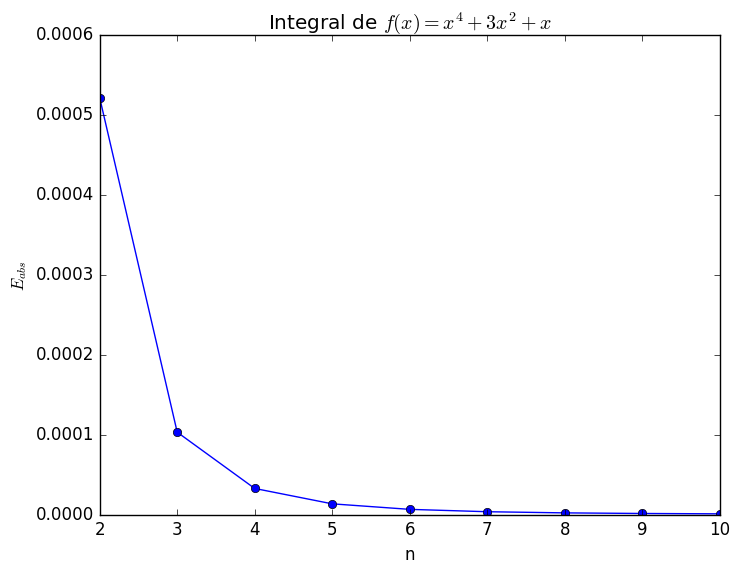

PyObject <matplotlib.text.Text object at 0x7f9b7c50e6d8>

In [172]:
f(x)=x^4+3*x^2+x
analitico=17//10;
err_abs=Float64[];
final=10;
n=2:1:final;
for i in n
    push!(err_abs,abs(analitico-simpson(f,0.0,1.0,i)))
end
plot(n,err_abs,"b-o")
ylabel(L"E_{abs}")
xlabel("n")
title(L"Integral de $f(x)=x^4+3x^2+x$")

Podemos ver que la aproximación se acerca a cero al aumentar $n$. A partir de un análisis logarítmico podemos encontrar que tan rápido disminuye el error respecto a $n$.

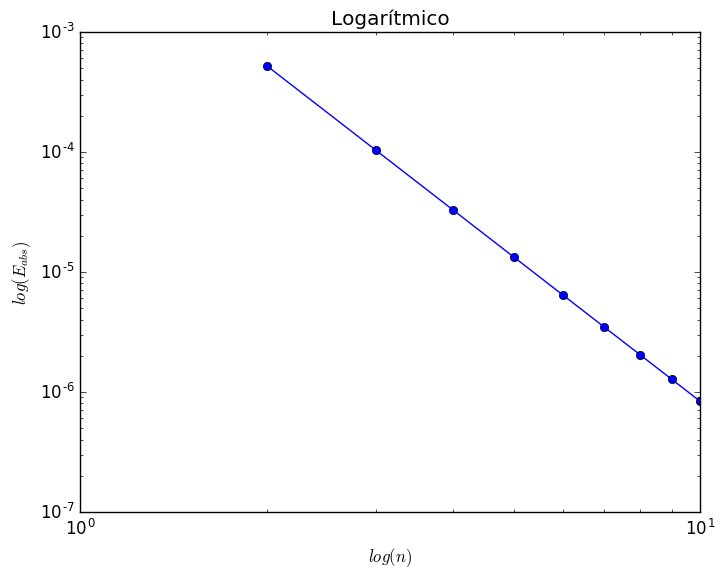

-3.960105390338973

In [163]:
loglog(n,err_abs,"b-o")
xlabel(L"$log(n)$")
ylabel(L"$log(E_{abs})$")
title("Logarítmico")
rapidez=(log(err_abs2[length(err_abs)])-log(err_abs2[1]))/(log(final)-log(1))

Podemos ver que el error disminuye con una velocidad del orden $4$ respecto a $n$. Esto quiere decir $E_{abs}\propto n^{-4}$

Para la función $f(x)=sen(x)$ tenemos que $\int_{0}^{\pi}f(x)=2$.

In [169]:
f(x)=sin(x)
analitico=2;
err_abs=Float64[];
final=10;
n=1:final
for i in n
    push!(err_abs,abs(analitico-simpson(f,0.0,pi,i)))
end

rapidez=(log(err_abs[length(err_abs)])-log(err_abs[1]))/(log(final)-log(1))

-4.143435340600695

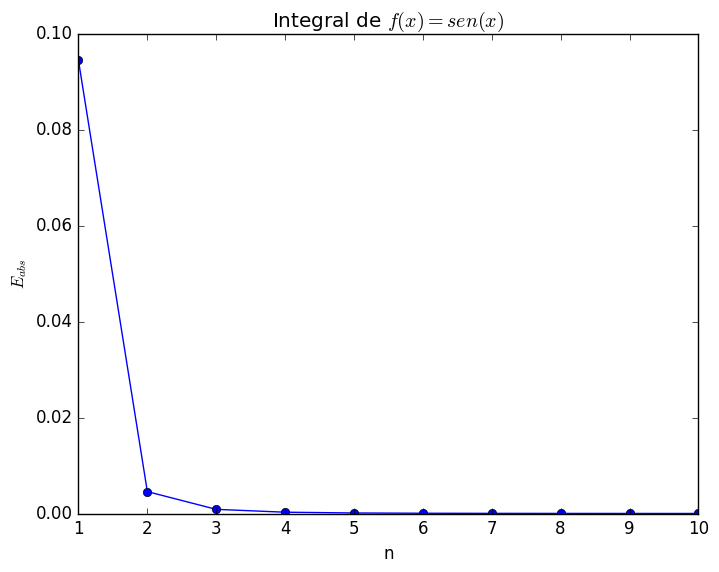

PyObject <matplotlib.text.Text object at 0x7f9b7d949da0>

In [170]:
plot(n,err_abs,"b-o")
ylabel(L"E_{abs}")
xlabel("n")
title(L"Integral de $f(x)=sen(x)$")

Podemos ver que la aproximación se acerca a cero al aumentar $n$. A partir de un análisis logarítmico podemos encontrar que tan rápido disminuye el error respecto a $n$.

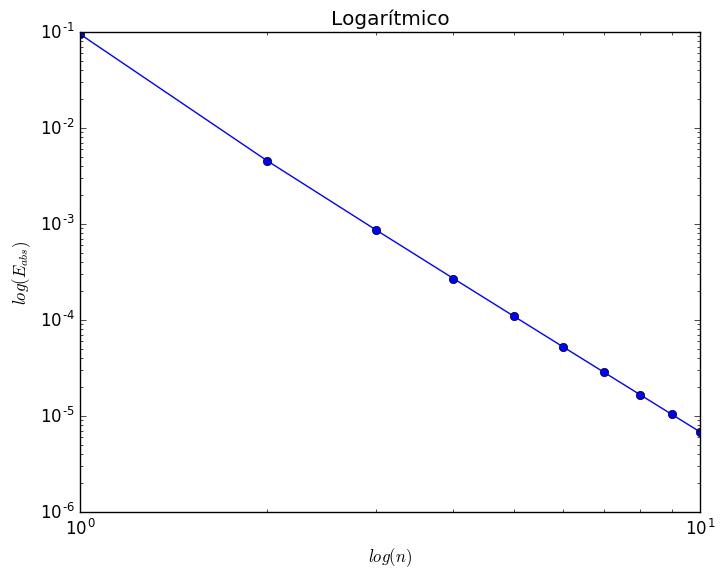

-4.143435340600695

In [171]:
loglog(n,err_abs,"b-o")
xlabel(L"$log(n)$")
ylabel(L"$log(E_{abs})$")
title("Logarítmico")
rapidez=(log(err_abs2[length(err_abs)])-log(err_abs2[1]))/(log(final)-log(1))

Podemos ver que nuevamente error disminuye con una velocidad del orden $4$ respecto a $n$. Esto quiere decir $E_{abs}\propto n^{-4}$